# 現在の方針
-kaggleのWorld Happiness Reportには2015～2019のcsvが存在するが、今回は学習の段階を鑑み、2019年のcsvのみを利用し、EDAを行う
-まずはデータの把握から進める

In [1]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("../../data/sql/db/world_happiness.db")
happiness = pd.read_csv("../../data/sql/raw/world_happiness/2019.csv")

happiness.to_sql("2019",conn,if_exists="replace",index=False)
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
happiness.isnull().sum().sort_values(ascending=False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [3]:
happiness["Score"].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

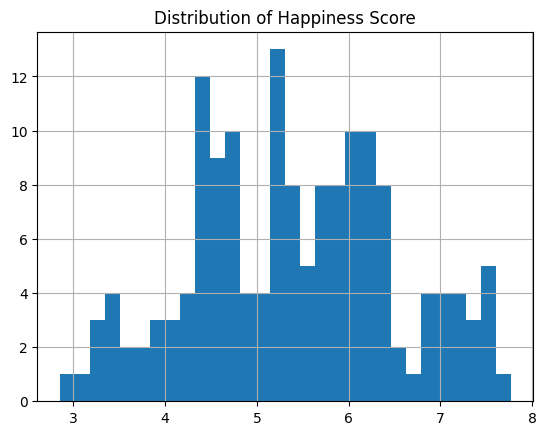

In [9]:
happiness["Score"].hist(bins=30)
plt.title("Distribution of Happiness Score")
plt.show()

# 現在の方針
上記までの内容で、データ理解は完了
この後は、どの列がスコアに寄与しているかなどを見ていく

In [ ]:
cols = [
    "Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]
# 文字列である国名、Scoreへの影響が考えられない順位の列を除外
happiness[cols].corr()["Score"].sort_values(ascending=False)
# .corr 2つの変数が、どれくらい一緒に増減するかを−1〜+1の範囲で表したもの

Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64

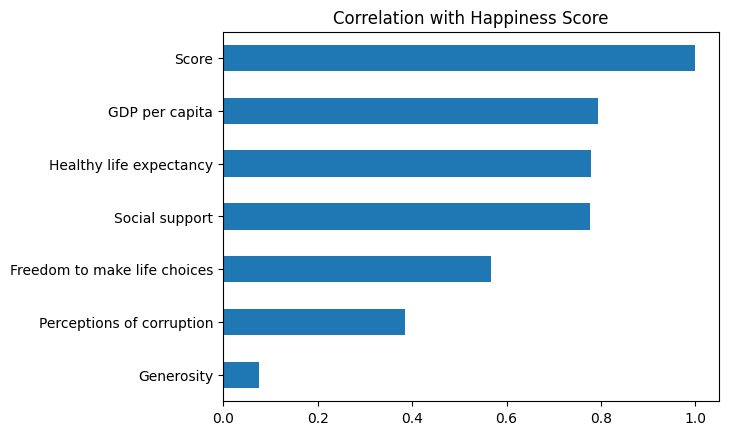

In [ ]:

happiness[cols].corr()["Score"].sort_values().plot(kind="barh")
plt.title("Correlation with Happiness Score")
plt.show()
# bash 横棒グラフ

# 現在の方針
相関の在り方を把握し、疑問を持った以下の３つの点について調べていく

1 相関は万遍ない物なのか？ 地域で変わらないのか？汚職が激しくても幸福度が高い国はあるのか？
2 GDPと健康寿命は共に社会的発展度を示す指標であり、ひとまとまりの変数と言う事は出来ないか？
3 Generosity(利他的行動の傾向)はスコアとの相関が低いが、本当に影響は無いのか?

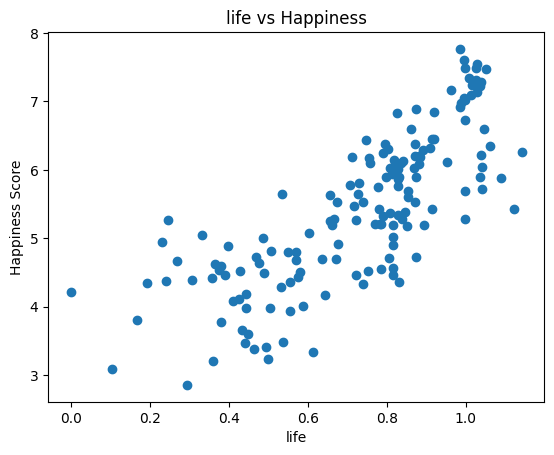

In [ ]:
plt.scatter(
    happiness["Healthy life expectancy"],
    happiness["Score"]
)
plt.xlabel("life")
plt.ylabel("Happiness Score")
plt.title("life vs Happiness")
plt.show()

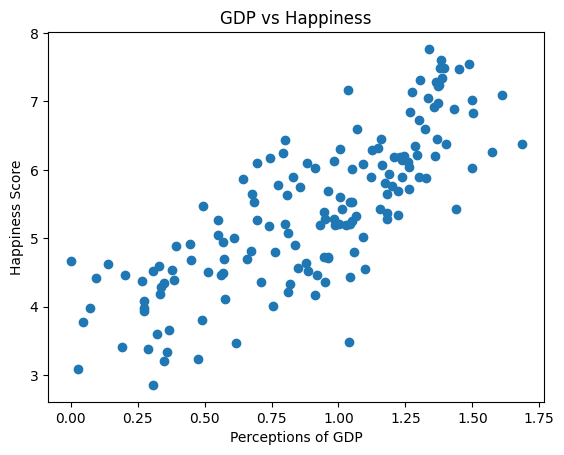

In [18]:
plt.scatter(
    happiness["GDP per capita"],
    happiness["Score"]
)
plt.xlabel("Perceptions of GDP")
plt.ylabel("Happiness Score")
plt.title("GDP vs Happiness")
plt.show()

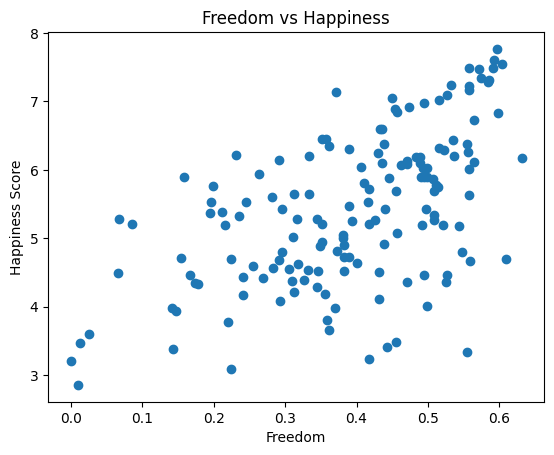

In [20]:
plt.scatter(
    happiness["Freedom to make life choices"],
    happiness["Score"]
)
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.title("Freedom vs Happiness")
plt.show()

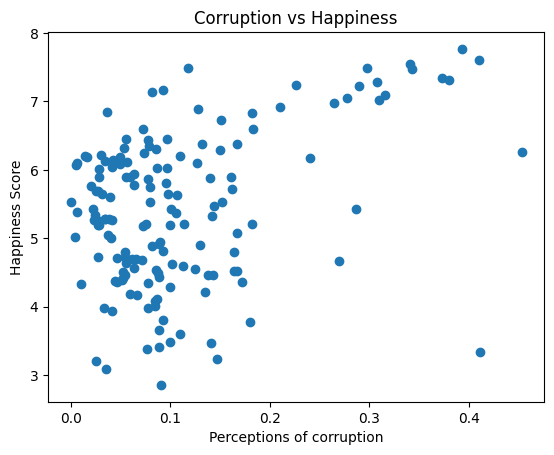

In [ ]:
plt.scatter(
    happiness["Perceptions of corruption"],
    happiness["Score"]
)
plt.xlabel("Perceptions of corruption")
plt.ylabel("Happiness Score")
plt.title("Corruption vs Happiness")
plt.show()

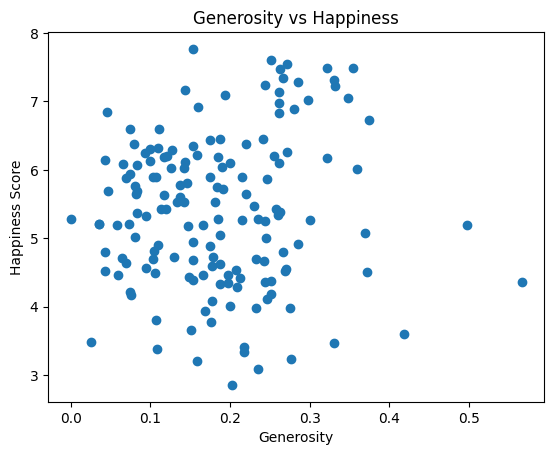

In [22]:
plt.scatter(
    happiness["Generosity"],
    happiness["Score"]
)
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.title("Generosity vs Happiness")
plt.show()

# 疑問1への答え
-GDP,健康寿命はスコアと綺麗に相関した
-自由も相関が見られるが幅が広かった
-汚職に関しては、汚職の値が0.2以上(汚職の少ない国)は全体的にスコアが高く,0.2以下ではバラつきが多い結果になった
-寛大さは、スコアへの影響は見られなかった

In [ ]:
happiness[["GDP per capita","Healthy life expectancy"]].corr()

,GDP per capita,Healthy life expectancy
GDP per capita,1.000000,0.835462
Healthy life expectancy,0.835462,1.000000


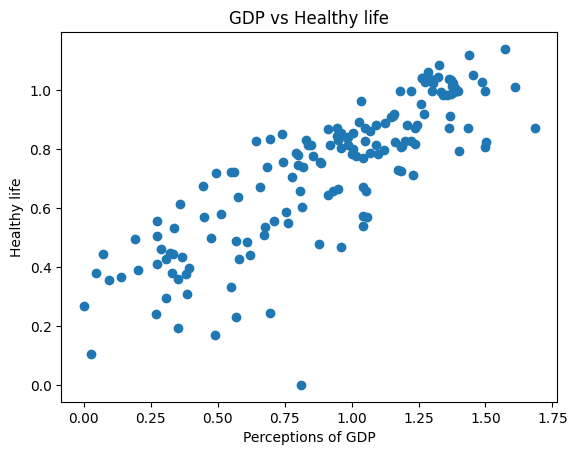

In [14]:
plt.scatter(
    happiness["GDP per capita"],
    happiness["Healthy life expectancy"]
)
plt.xlabel("Perceptions of GDP")
plt.ylabel("Healthy life")
plt.title("GDP vs Healthy life")
plt.show()

# 疑問2への答え
-約0.835　強い正の相関
-ひとまとまりとは言えないまでも、GDP列と健康寿命列の与える影響は共通点が多いと言える

In [21]:
happiness[cols].corr()["Generosity"].sort_values(ascending=False)

Generosity                      1.000000
Perceptions of corruption       0.326538
Freedom to make life choices    0.269742
Score                           0.075824
Healthy life expectancy        -0.029511
Social support                 -0.048126
GDP per capita                 -0.079662
Name: Generosity, dtype: float64

# 疑問3への答え
-最も相関が強い汚職に関してでも約0.33
-スコアへの影響が無いと断言する事は出来ないが、今回のデータの中からスコアへの影響を見つけるのは困難であると感じる